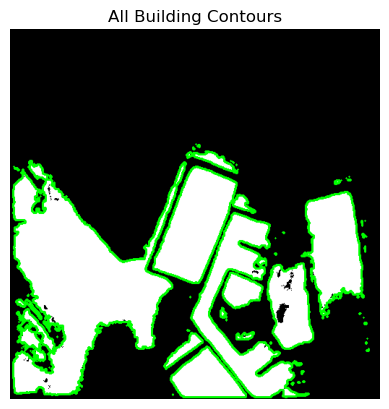

Total building area in pixels: 80152.0
Total building area in square meters: 5009.50 m²
Number of solar panels that can fit: 2946
Estimated total daily solar energy generation: 4507.38 kWh/day


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = 'predicted_mask.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Threshold the image to binary
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Finding contours in the binary image
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Visualize all contours
contour_image = cv2.cvtColor(binary_image, cv2.COLOR_GRAY2BGR)
cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2)  # Draw all contours

plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for matplotlib
plt.title('All Building Contours')
plt.axis('off')
plt.show()

# Calculate the total area of all contours in pixels
total_area_pixels = sum(cv2.contourArea(contour) for contour in contours)

# Convert area in pixels to real-world area (in square meters)
GSD = 0.25  # Ground Sampling Distance in meters/pixel
total_area_m2 = total_area_pixels * (GSD ** 2)

print(f"Total building area in pixels: {total_area_pixels}")
print(f"Total building area in square meters: {total_area_m2:.2f} m²")

# Calculating how many standard solar panels (1.7m x 1m) can fit in the area
panel_width = 1.7  # Panel width in meters
panel_height = 1.0  # Panel height in meters
panel_area_m2 = panel_width * panel_height  # Standard solar panel size in square meters
num_panels = int(total_area_m2 // panel_area_m2)  # Integer number of panels

print(f"Number of solar panels that can fit: {num_panels}")

# Estimating solar energy potential
# Assuming average solar irradiance (in kWh/m²/day) and panel efficiency
solar_irradiance = 5  # Average solar irradiance in kWh/m²/day (replace with your value)
panel_efficiency = 0.18  # Solar panel efficiency (18%)

# Calculate energy generation for each panel (per day)
energy_per_panel = panel_area_m2 * solar_irradiance * panel_efficiency

# Total energy generation (in kWh/day)
total_energy = energy_per_panel * num_panels

print(f"Estimated total daily solar energy generation: {total_energy:.2f} kWh/day")
